In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits, y_digits = digits.data, digits.target

In [35]:
# Plot the PCA spectrum

pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

[20, 30, 40, 50, 64]


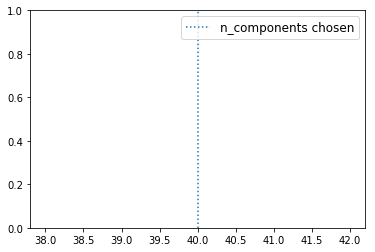

In [43]:
# n_components = np.arange(0,65, 10)
n_components = [20, 30 ,40 ,50 ,64]
print(n_components)
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using'__' separated parameters names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
           linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

